In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import scipy
sys.path.append(os.path.join('..', 'importantfunctions'))
from ODEsolvers import *

In [3]:
#this is the diffeq that does the affect of body b on a
def Fab(ra,rb,t,mb,G=1): #where ra is the vector (x,y,vx,vy) for body a and rb is for body b
    dx=rb[0]-ra[0]
    dy=rb[1]-ra[1]
    
    vx=ra[2]
    vy=ra[3]
    
    R=(dx**2+dy**2)**0.5

    ax=G*mb*dx/(R**3)
    ay=G*mb*dy/(R**3)
    
    return np.array([vx,vy,ax,ay],float)

In [4]:
def diffeq(state,t,m1=1,m2=1,m3=1):
    r1=state[0:4]
    r2=state[4:8]
    r3=state[8:12]
    planet=state[12:16]

    dr1=Fab(r1,r2,t,m2)+Fab(r1,r3,t,m3) #just adding up the effects of the different stars on each other but effects from planet
    dr2=Fab(r2,r1,t,m1)+Fab(r2,r3,t,m3)
    dr3=Fab(r3,r1,t,m1)+Fab(r3,r2,t,m2)

    dplanet=Fab(planet,r1,t,m1)+Fab(planet,r2,t,m2)+Fab(planet,r3,t,m3) #planet is affected by all three stars

    return np.concatenate([dr1,dr2,dr3,dplanet])

In [96]:
R01=np.array([1,0,0,0.57735])
R02=np.array([-0.5,np.sqrt(3)/2,-0.5*np.sqrt(1/3),-np.sqrt(3)/2*np.sqrt(1/3)])
R03=np.array([-0.5,-np.sqrt(3)/2,0.5*np.sqrt(1/3),-np.sqrt(3)/2*np.sqrt(1/3)])

In [102]:
#this came from ChatGPT as a suggestion for the starting parameters of the planet 
#after testing I modified the planet velocity by *0.8 so it wouldn't fly away 
# Center of mass of stars
com = (R01[:2] + R02[:2] + R03[:2]) / 3
planet0_pos = com + np.array([2.0, 0.0])  # place planet 2 units to the right of COM

# approximate circular velocity
M_total = 3.0
r = np.linalg.norm(planet0_pos - com)
G=1
v_circ = np.sqrt(G * M_total / r)

# velocity perpendicular to radius vector (positive y-direction here)
planet0_vel = np.array([0.0, v_circ])
planet0 = np.concatenate([planet0_pos, planet0_vel*0.8])
R0=np.concatenate([R01,R02,R03,planet0])
R0

array([ 1.        ,  0.        ,  0.        ,  0.57735   , -0.5       ,
        0.8660254 , -0.28867513, -0.5       , -0.5       , -0.8660254 ,
        0.28867513, -0.5       ,  2.        ,  0.        ,  0.        ,
        0.9797959 ])

In [7]:
h=0.00001
Ts,Rs=RK4(diffeq,R0,h=h,N=1000000)

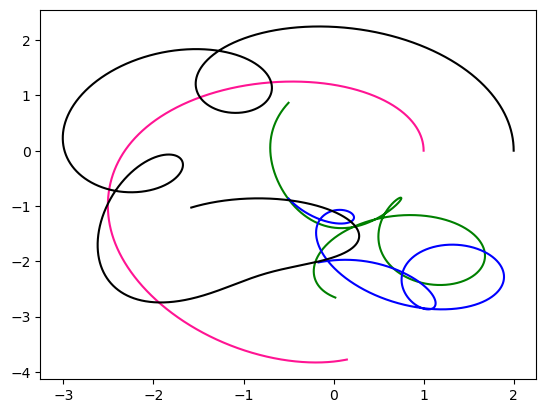

In [8]:
plt.plot(Rs[:,0],Rs[:,1],color='deeppink')
plt.plot(Rs[:,4],Rs[:,5],color='green')
plt.plot(Rs[:,8],Rs[:,9],color='blue')
plt.plot(Rs[:,12],Rs[:,13],color='black')

In [9]:
R01=np.array([-1,0,0.3471168881,0.5327249454])
R02=np.array([1,0,0.3471168881,0.5327249454])
R03=np.array([0,0,-0.6942337762,-1.0654498908])

# Center of mass of stars
com = (R01[:2] + R02[:2] + R03[:2]) / 3
planet0_pos = com + np.array([2.0, 0.0])  # place planet 2 units to the right of COM

# approximate circular velocity
M_total = 3.0
r = np.linalg.norm(planet0_pos - com)
G=1
v_circ = np.sqrt(G * M_total / r)

# velocity perpendicular to radius vector (positive y-direction here)
planet0_vel = np.array([0.0, v_circ])
planet0 = np.concatenate([planet0_pos, planet0_vel*0.8])
R0=np.concatenate([R01,R02,R03,planet0])

In [10]:
Ts,Rs=RK4(diffeq,R0,h=0.00001,maxt=7) #period is 6.3259139829

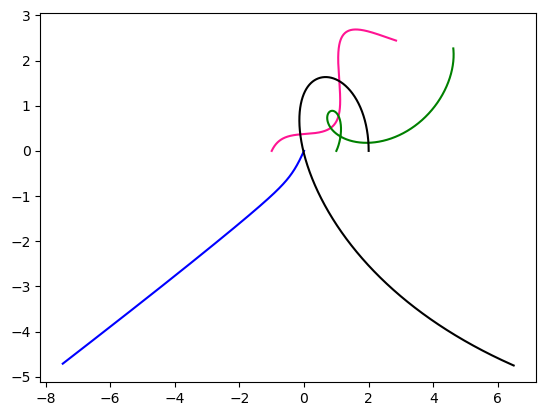

In [11]:
plt.plot(Rs[:,0],Rs[:,1],color='deeppink')
plt.plot(Rs[:,4],Rs[:,5],color='green')
plt.plot(Rs[:,8],Rs[:,9],color='blue')
plt.plot(Rs[:,12],Rs[:,13],color='black')

In [42]:
def threestarsandplanet_forscipy(t,state,m1=1,m2=1,m3=1):
    r1=state[0:4]
    r2=state[4:8]
    r3=state[8:12]
    planet=state[12:16]

    dr1=Fab(r1,r2,t,m2)+Fab(r1,r3,t,m3) #just adding up the effects of the different stars on each other but effects from planet
    dr2=Fab(r2,r1,t,m1)+Fab(r2,r3,t,m3)
    dr3=Fab(r3,r1,t,m1)+Fab(r3,r2,t,m2)

    dplanet=Fab(planet,r1,t,m1)+Fab(planet,r2,t,m2)+Fab(planet,r3,t,m3) #planet is affected by all three stars

    return np.concatenate([dr1,dr2,dr3,dplanet])

In [44]:
#this is the butterfly I sequence orbit 1.2.A
R01=np.array([-1,0,0.306893,0.125507])
R02=np.array([1,0,0.306893,0.125507])
R03=np.array([0,0.3133550361,-0.613786,-0.251014])
R0=np.concatenate([R01,R02,R03])
t_span=(0,10)
Ts=np.linspace(t_span[0],t_span[1],10000)

In [90]:
# Center of mass of stars
com = (R01[:2] + R02[:2] + R03[:2]) / 3
planet0_pos = com + np.array([1.25, 0.0])  # place planet 2 units to the right of COM

# approximate circular velocity
M_total = 3.0
r = np.linalg.norm(planet0_pos - com)
G=1
v_circ = np.sqrt(G * M_total / r)

# velocity perpendicular to radius vector (positive y-direction here)
planet0_vel = np.array([0.0, v_circ])
planet0 = np.concatenate([planet0_pos, planet0_vel])
R0=np.concatenate([R01,R02,R03,planet0])

In [92]:
results=scipy.integrate.solve_ivp(threestarsandplanet_forscipy,t_span=t_span,y0=R0,first_step=0.0000001,t_eval=Ts,rtol=1e-12,atol=1e-12)
Rs=results.y.T

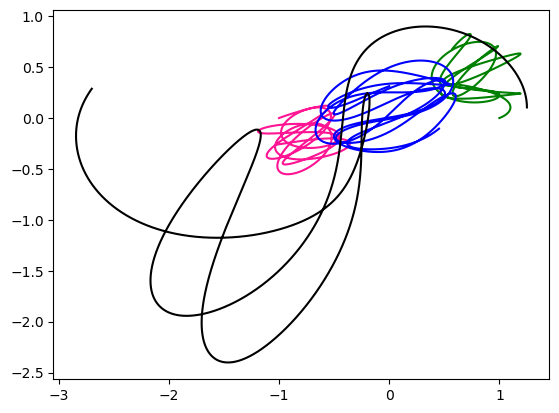

In [93]:
plt.plot(Rs[:,0],Rs[:,1],color='deeppink')
plt.plot(Rs[:,4],Rs[:,5],color='green')
plt.plot(Rs[:,8],Rs[:,9],color='blue')
plt.plot(Rs[:,12],Rs[:,13],color='black')